In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics as stat

In [21]:
df=pd.read_csv('C:/Users/user/Documents/Sales_add (1).csv')
df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [23]:
df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [24]:
stat.mean(df['Sales_before_digital_add(in $)'])

149239.95454545456

In [25]:
stat.mean(df['Sales_After_digital_add(in $)'])

231123.72727272726

In [26]:
stat.median(df['Sales_before_digital_add(in $)'])

147444.0

In [27]:
stat.median(df['Sales_After_digital_add(in $)'])

229986.5

In [28]:
stat.variance(df['Sales_before_digital_add(in $)'])

220345610.23593074

In [29]:
stat.variance(df['Sales_After_digital_add(in $)'])

653148853.7316017

In [30]:
df['Sales_before_digital_add(in $)'].skew()

0.5780328152845783

In [31]:
df['Sales_After_digital_add(in $)'].skew()

-0.02266883113277529

In [32]:
#if the skewness value <-1 or >+1 : Highly Skewed Distribution

#if the skewness value is between -1 & -1/2 or b/w +1/2 & +1 : Moderately Skewed Distribution

#if the skewness value is between -1/2 & +1/2 : Approximately Symmetric Distribution

# 1. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

Null Hypothesis, H0 = "No Increase in Sales" After Stepping into Digital Marketing

Alternate Hypothesis, HA = "Increase in Sales" After Stepping into Digital Marketing

TESTING THE HYPOTHESIS => "TWO SAMPLE T-TEST"


In [33]:
from scipy.stats import ttest_ind

In [36]:
df.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [38]:
ttest_ind(df['Sales_before_digital_add(in $)'],df['Sales_After_digital_add(in $)'])

Ttest_indResult(statistic=-12.995084451110875, pvalue=2.614368006904645e-16)

In [40]:
t_test,p_value = ttest_ind(df['Sales_before_digital_add(in $)'],df['Sales_After_digital_add(in $)'])

In [41]:
p_value

2.614368006904645e-16

In [42]:
if p_value<0.05:
    print('Null Hypothesis H0 is Rejected')
else:
    print('Null Hypothesis H0 is Accepted')

Null Hypothesis H0 is Rejected


# Inference: With reference to the p value we can say that H0 = "No Increase in Sales After Stepping into Digital Marketing is" can be REJECTED.
=>There is increase in sales after stepping into digital marketing.

# 2.The company needs to check whether there is any dependency between the features “Region” and “Manager”.

H0= There is no dependency between the features “Region” and “Manager”

HA= There is a dependency between the features “Region” and “Manager”

"Here after the analysis, it is noticable that use of 'Chi-Square Of Association' is appliable."


In [44]:
from scipy.stats import chi2_contingency

In [45]:
relation_data = (df['Sales_before_digital_add(in $)'],df['Sales_After_digital_add(in $)'])

In [46]:
chi2_contingency(relation_data)

(50418.98816785626,
 0.0,
 21,
 array([[158243.59208   , 146308.74878564, 153225.29220049,
         150656.89571799, 163978.34352948, 154633.8689454 ,
         138397.96206394, 141947.26157215, 155971.42831125,
         131712.12704074, 142236.43178413, 178609.8854221 ,
         137421.37501155, 158767.00193451, 147841.311673  ,
         143015.66114775, 147437.57198762, 141058.95579207,
         140926.337703  , 143240.09176003, 161187.08587953,
         146461.76965765],
        [245067.40792   , 226584.25121436, 237295.70779951,
         233318.10428201, 253948.65647052, 239477.1310546 ,
         214333.03793606, 219829.73842785, 241548.57168875,
         203978.87295926, 220277.56821587, 276608.1145779 ,
         212820.62498845, 245877.99806549, 228957.688327  ,
         221484.33885225, 228332.42801238, 218454.04420793,
         218248.662297  , 221831.90823997, 249625.91412047,
         226821.23034235]]))

In [47]:
chi_stat,p_value1,dof,relation = chi2_contingency(relation_data)

In [48]:
p_value1

0.0

In [49]:
if p_value1<0.05:
    print('Null Hypothesis Rejected')
else:
    print('Null Hypothesis Accepted')

Null Hypothesis Rejected


#  Inference: From the P value we can say that H0 = "There is no Dependency between the features REGION and MANAGER"  is REJECTED.
=>There is Dependency between the features REGION and MANAGER

# visual confirmation on the relationship b/w REGION & MANAGER.

In [50]:
df["Profit"]=df['Sales_After_digital_add(in $)']-df['Sales_before_digital_add(in $)']

In [51]:
df.head(2)

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $),Profit
0,Month-1,Region - A,Manager - A,132921,270390,137469
1,Month-2,Region - A,Manager - C,149559,223334,73775


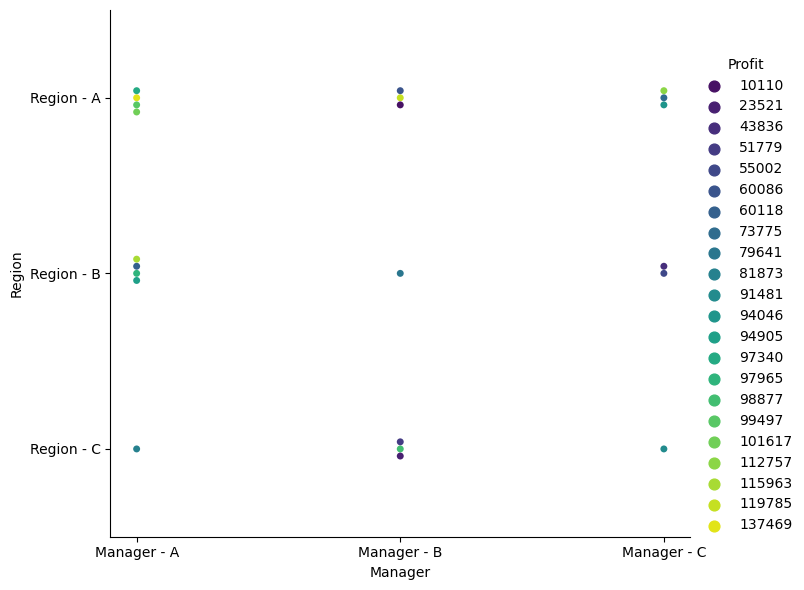

In [52]:
sns.catplot(data=df, x="Manager", hue="Profit",y="Region",kind="swarm", height=6,aspect=1.2,orient='h',palette='viridis',)
plt.show()

# The above plot gives an idea about where to place a particular manager so that the outcome is most favourable for the firm